In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

import lightgbm as lgb
from sklearn.model_selection import train_test_split


%matplotlib inline



In [24]:
data = pd.read_csv("day_approach_maskedID_timeseries.csv")

In [25]:

X,y = data.loc[:,data.columns != 'injury'], data.loc[:,'injury']
X.drop(columns=['Date', 'Athlete ID'], inplace=True)
X

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,1.0,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,1.0,11.1,0.0,0.0,0.0,0.0,0.0,0.79,0.80,0.11


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=None)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [12]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric':['auc','binary_logloss'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

In [13]:
evals_result = {}  # to record eval results for plotting
categorical=['f1','f11','f21','f31','f41','f51','f61']
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
                categorical_feature=categorical,
                early_stopping_rounds=5,
                evals_result=evals_result)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.664146	training's binary_logloss: 0.0704131	valid_1's auc: 0.576916	valid_1's binary_logloss: 0.0736068
Training until validation scores don't improve for 5 rounds
[2]	training's auc: 0.718209	training's binary_logloss: 0.0692294	valid_1's auc: 0.597371	valid_1's binary_logloss: 0.0735417
[3]	training's auc: 0.723274	training's binary_logloss: 0.0679494	valid_1's auc: 0.602101	valid_1's binary_logloss: 0.0735687
[4]	training's auc: 0.740322	training's binary_logloss: 0.0668865	valid_1's auc: 0.61469	valid_1's binary_logloss: 0.0734869
[5]	training's auc: 0.753607	training's binary_logloss: 0.0660504	valid_1's auc: 0.611602	valid_1's binary_logloss: 0.0734842
[6]	training's auc: 0.768977	training's binary_logloss: 0.0651724	valid_1's auc: 0

In [14]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [115]:
params['metric'][0]

'auc'

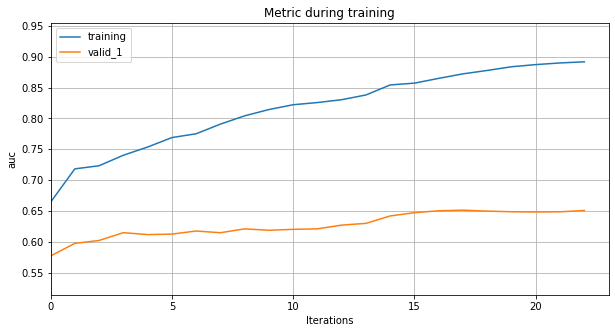

In [15]:
 render_metric(params['metric'][0])

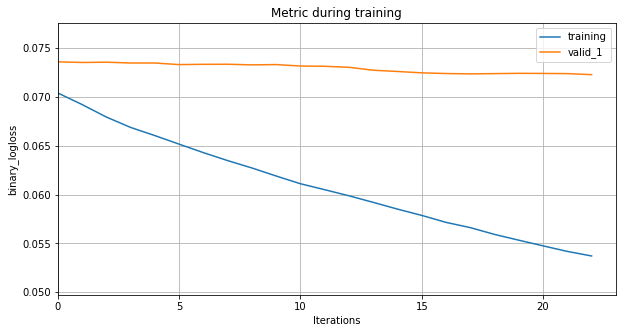

In [16]:
    render_metric(params['metric'][1])

In [4]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

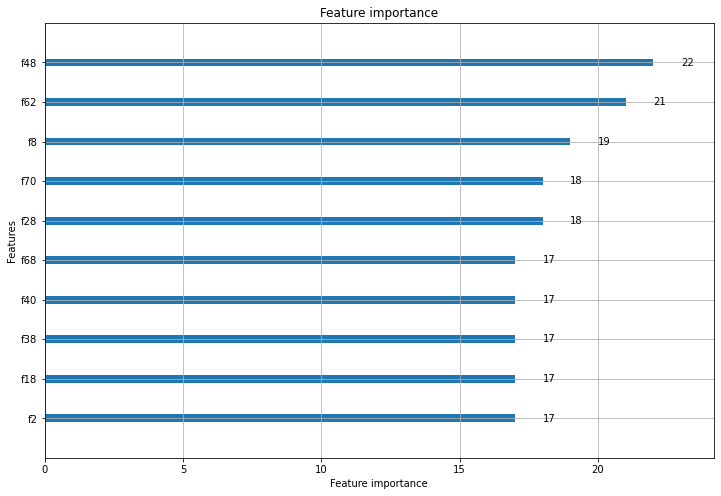

In [17]:
 render_plot_importance(importance_type='split')

In [20]:
def render_histogram(feature):
    ax = lgb.plot_split_value_histogram(gbm, feature=feature,
                                        bins='auto', figsize=(10, 5))
    plt.show()

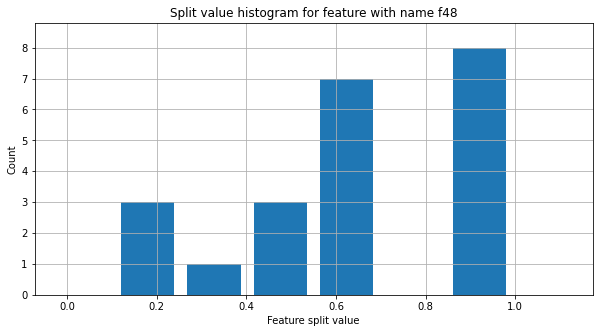

In [21]:
 render_histogram(feature='f48')

In [22]:
def render_tree(tree_index, show_info, precision=3):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)